## OBJECTIVE
- leveraging advanced machine learning techniques to develop a predictive model aimed at forecasting seizures triggered by fluctuations in body temperature. Through comprehensive data analysis, model training, and evaluation, our notebook guides you through the process of harnessing artificial intelligence to enhance seizure prediction, offering insights into potential risk factors and empowering proactive healthcare interventions."

## Data Exploration and Preprocessing:

Begin by thoroughly exploring your dataset, checking for missing values, outliers, and any inconsistencies in the data.
Perform feature engineering if necessary, creating new features or transforming existing ones to better represent the underlying patterns in the data.
Split your data into training and testing sets to evaluate your model's performance accurately.

## Model Selection:

Start by experimenting with different machine learning models suitable for binary classification tasks. Logistic Regression, Decision Trees, Random Forests, Gradient Boosting Machines (GBM), and Support Vector Machines (SVM) are all potential candidates.
Consider using ensemble methods like Random Forests or Gradient Boosting to improve predictive performance.
Additionally, you may explore deep learning models like Convolutional Neural Networks (CNNs) or Recurrent Neural Networks (RNNs) if the data exhibits complex temporal patterns.

## Model Training and Evaluation:

Train your chosen models on the training dataset and evaluate their performance using appropriate evaluation metrics such as accuracy, precision, recall, F1-score, and ROC-AUC.
Perform hyperparameter tuning using techniques like grid search or random search to optimize model performance.

## Model Interpretation and Validation:

After selecting the best-performing model, validate it using the testing dataset to ensure its generalization to unseen data.
Interpret the model's predictions and identify the most influential features contributing to seizure prediction. This step is crucial for understanding the model's decision-making process and gaining insights into the underlying relationships in the data.

## Deployment and Monitoring:

Once you're satisfied with your model's performance, deploy it in a real-world setting where it can assist in predicting seizures.
Implement a monitoring system to track the model's performance over time and ensure its continued accuracy and reliability. Regularly update the model as new data becomes available or as the underlying patterns in the data change.

In [89]:
#  imports 

#data exploration, visualization and preprocessing 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# model selection
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression


# model Evaluation
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score, roc_auc_score



In [90]:
df = pd.read_csv("dataset.csv")
df.head()

,Age,BodyTemp_Celsius,HeartRate,Seizure,Gender,PatientID,DateTime
0,25,36.7,86,No,Female,749979,2024-02-28 12:50:27.838104639
1,35,36.7,70,No,Male,549917,2024-04-02 18:28:47.147087857
2,29,37.8,80,Yes,Male,561158,2024-01-17 15:32:31.036525172
3,30,36.7,70,No,Male,483038,2024-03-03 10:16:56.386969397
4,35,36.7,76,No,Female,466512,2024-03-12 00:29:51.115498519


## Data Exploration and Preprocessing

In [91]:

df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1014.0,29.871795,13.474386,10.0,19.00,26.0,39.0,70.0
BodyTemp_Celsius,1014.0,37.059763,0.743991,36.7,36.70,36.7,36.7,39.4
HeartRate,1014.0,74.301775,8.088702,7.0,70.00,76.0,80.0,90.0
PatientID,1014.0,546912.447732,266632.597093,100983.0,320082.25,544634.5,783881.0,998710.0


In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1014 non-null   int64  
 1   BodyTemp_Celsius  1014 non-null   float64
 2   HeartRate         1014 non-null   int64  
 3   Seizure           1014 non-null   object 
 4   Gender            1014 non-null   object 
 5   PatientID         1014 non-null   int64  
 6   DateTime          1014 non-null   object 
dtypes: float64(1), int64(3), object(3)
memory usage: 55.6+ KB


In [93]:
df.columns

Index(['Age', 'BodyTemp_Celsius', 'HeartRate', 'Seizure', 'Gender',
       'PatientID', 'DateTime'],
      dtype='object')

In [94]:
df.isnull().sum()
# we can see we dont have null values

Age                 0
BodyTemp_Celsius    0
HeartRate           0
Seizure             0
Gender              0
PatientID           0
DateTime            0
dtype: int64

Number of potential outliers:
Age                   1
BodyTemp_Celsius    210
HeartRate             2
dtype: int64


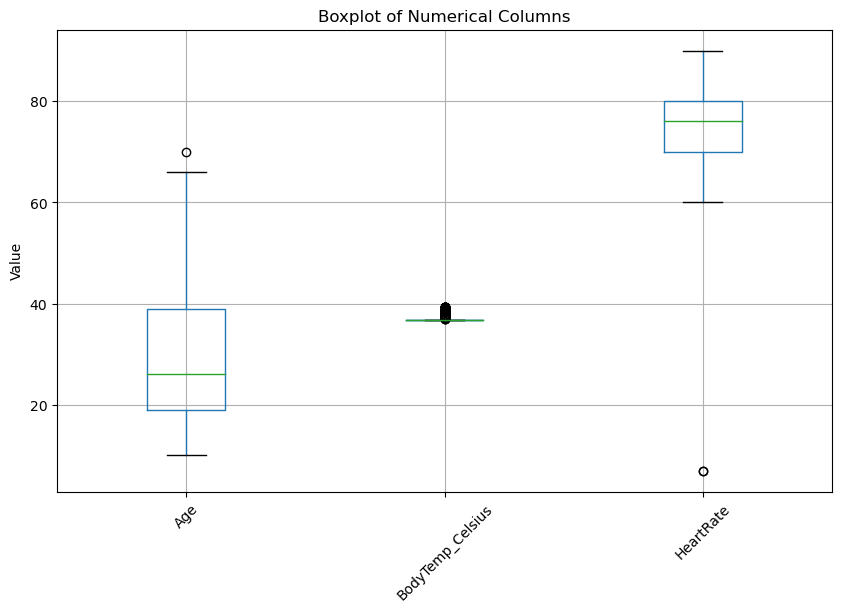

In [95]:
# check for outliers
numerical_cols = ['Age', 'BodyTemp_Celsius', 'HeartRate']

#  we use the interquartile range 
Q1 = df[numerical_cols].quantile(0.25) 
Q3 = df[numerical_cols].quantile(0.75) 
IQR = Q3 - Q1

potential_outliers = ((df[numerical_cols] < (Q1 - 1.5 * IQR)) | (df[numerical_cols] > (Q3 + 1.5 * IQR)))

print("Number of potential outliers:")
print(potential_outliers.sum())

plt.figure(figsize=(10, 6))
df[numerical_cols].boxplot()
plt.title('Boxplot of Numerical Columns')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [96]:


# Define the bins and labels for age groups
bins = [0, 18, 30, 50, float('inf')]  # Define age bins (e.g., 0-18, 19-30, 31-50, 51 and above)
labels = ['Children', 'Young Adults', 'Adults', 'Seniors']  # Define corresponding labels for age groups

# Create a new column 'AgeGroup' with age groups
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Display the DataFrame with the new 'AgeGroup' column
print(df)


      Age  BodyTemp_Celsius  HeartRate Seizure  Gender  PatientID  \
0      25              36.7         86      No  Female     749979   
1      35              36.7         70      No    Male     549917   
2      29              37.8         80     Yes    Male     561158   
3      30              36.7         70      No    Male     483038   
4      35              36.7         76      No  Female     466512   
...   ...               ...        ...     ...     ...        ...   
1009   22              36.7         80      No  Female     141842   
1010   55              36.7         60      No    Male     800296   
1011   35              36.7         86      No    Male     101933   
1012   43              36.7         70      No    Male     118426   
1013   32              38.3         76     Yes    Male     209248   

                           DateTime      AgeGroup  
0     2024-02-28 12:50:27.838104639  Young Adults  
1     2024-04-02 18:28:47.147087857        Adults  
2     2024-01-1

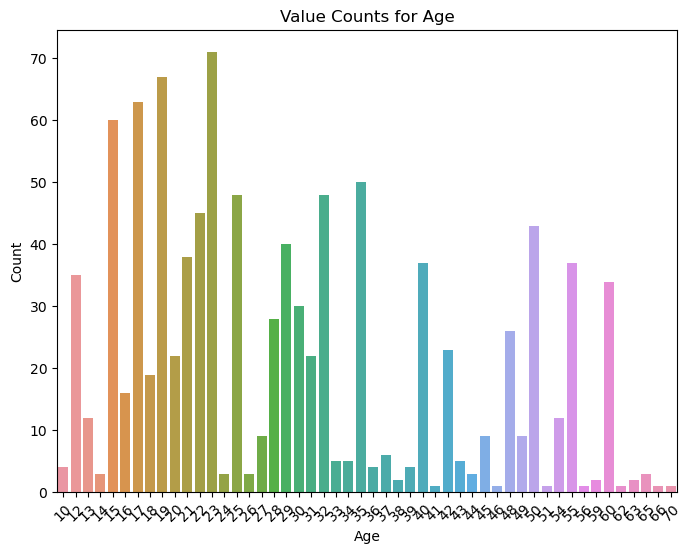

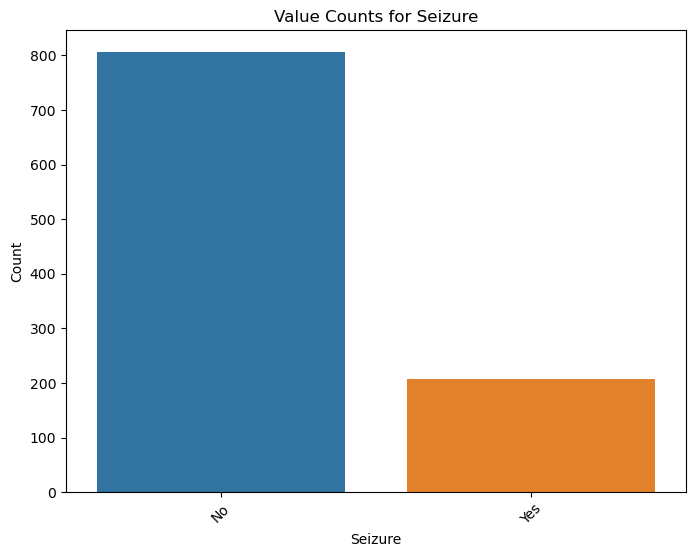

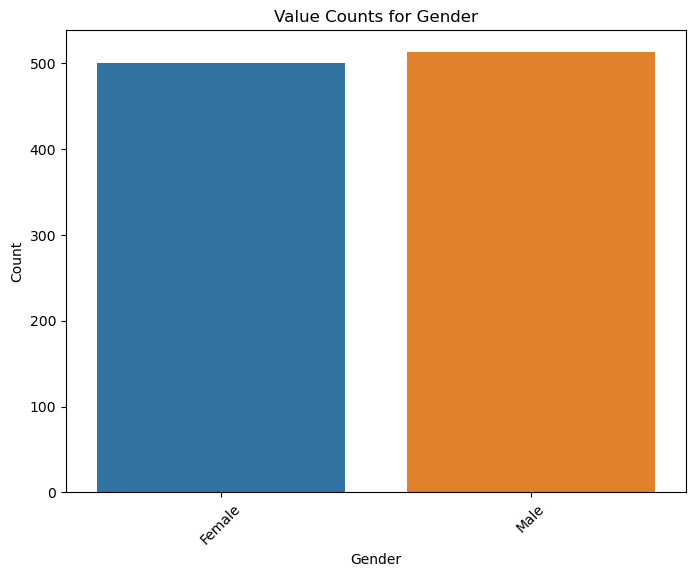

In [97]:
#  We plot to see the distribution of our data 
columns_to_plot = ['Age',  'Seizure', 'Gender']

# Plot value counts for each column using bar plots
for column in columns_to_plot:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=column, data=df)
    plt.title(f'Value Counts for {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

In [98]:

# Convert 'DateTime' column to datetime data type
df['DateTime'] = pd.to_datetime(df['DateTime'])

# Set 'DateTime' column as the index
df.set_index('DateTime', inplace=True)

In [99]:
df.columns

Index(['Age', 'BodyTemp_Celsius', 'HeartRate', 'Seizure', 'Gender',
       'PatientID', 'AgeGroup'],
      dtype='object')

In [100]:
df.head()

,Age,BodyTemp_Celsius,HeartRate,Seizure,Gender,PatientID,AgeGroup
DateTime,,,,,,,
2024-02-28 12:50:27.838104639,25,36.7,86,No,Female,749979,Young Adults
2024-04-02 18:28:47.147087857,35,36.7,70,No,Male,549917,Adults
2024-01-17 15:32:31.036525172,29,37.8,80,Yes,Male,561158,Young Adults
2024-03-03 10:16:56.386969397,30,36.7,70,No,Male,483038,Adults
2024-03-12 00:29:51.115498519,35,36.7,76,No,Female,466512,Adults


In [101]:

le = LabelEncoder()

# Encode 'Gender' column
df['Gender_encoded'] = le.fit_transform(df['Gender'])
df.drop(columns=['Gender'], inplace=True)


# Encode 'Seizure' column
df['Seizure_encoded'] = le.fit_transform(df['Seizure'])
df.drop(columns=['Seizure'], inplace=True)

# Encode 'AgeGroup' column
df['AgeGroup_encoded'] = le.fit_transform(df['AgeGroup'])
df.drop(columns=['AgeGroup'], inplace=True)


In [102]:
df.head()

,Age,BodyTemp_Celsius,HeartRate,PatientID,Gender_encoded,Seizure_encoded,AgeGroup_encoded
DateTime,,,,,,,
2024-02-28 12:50:27.838104639,25,36.7,86,749979,0,0,3
2024-04-02 18:28:47.147087857,35,36.7,70,549917,1,0,0
2024-01-17 15:32:31.036525172,29,37.8,80,561158,1,1,3
2024-03-03 10:16:56.386969397,30,36.7,70,483038,1,0,0
2024-03-12 00:29:51.115498519,35,36.7,76,466512,0,0,0


In [103]:
df.shape

(1014, 7)

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1014 entries, 2024-02-28 12:50:27.838104639 to 2024-01-23 00:25:35.241855873
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1014 non-null   int64  
 1   BodyTemp_Celsius  1014 non-null   float64
 2   HeartRate         1014 non-null   int64  
 3   PatientID         1014 non-null   int64  
 4   Gender_encoded    1014 non-null   int32  
 5   Seizure_encoded   1014 non-null   int32  
 6   AgeGroup_encoded  1014 non-null   int32  
dtypes: float64(1), int32(3), int64(3)
memory usage: 51.5 KB


In [105]:

# Define features (X) and target variable (y)
X = df.drop(columns=['Seizure_encoded'])  
y = df['Seizure_encoded']  

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Display the shapes of the resulting datasets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)


Training set shape: (709, 6) (709,)
Testing set shape: (305, 6) (305,)


# Model Selection

In [106]:




# Initialize models
logistic_regression = LogisticRegression()
decision_tree = DecisionTreeClassifier()
random_forest = RandomForestClassifier()

# Train each model
logistic_regression.fit(X_train, y_train)
decision_tree.fit(X_train, y_train)
random_forest.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_lr = logistic_regression.predict(X_test)
y_pred_dt = decision_tree.predict(X_test)
y_pred_rf = random_forest.predict(X_test)

# Evaluate performance
models = ['Logistic Regression', 'Decision Tree', 'Random Forest']
for i, y_pred in enumerate([y_pred_lr, y_pred_dt, y_pred_rf]):
    print(f"\nEvaluation for {models[i]}:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1-score:", f1_score(y_test, y_pred))
    print("ROC-AUC score:", roc_auc_score(y_test, y_pred))



Evaluation for Logistic Regression:
Accuracy: 0.8032786885245902
Precision: 0.35
Recall: 0.12962962962962962
F1-score: 0.1891891891891892
ROC-AUC score: 0.5389184004721853

Evaluation for Decision Tree:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0
ROC-AUC score: 1.0

Evaluation for Random Forest:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0
ROC-AUC score: 1.0


c:\Users\George\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [108]:
# Hyperparameter Tuning 
# Example: Perform grid search for Random Forest hyperparameters
from sklearn.model_selection import GridSearchCV

# Define hyperparameters to search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid, cv=5, scoring='accuracy')

# Perform grid search
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Retrain the Random Forest model with the best hyperparameters
best_random_forest = RandomForestClassifier(**best_params)
best_random_forest.fit(X_train, y_train)

# Make predictions on the testing data using the best model
y_pred_best_rf = best_random_forest.predict(X_test)

# Evaluate performance of the best model
print("\nEvaluation for Best Random Forest Model:")
print("Accuracy:", accuracy_score(y_test, y_pred_best_rf))
print("Precision:", precision_score(y_test, y_pred_best_rf))
print("Recall:", recall_score(y_test, y_pred_best_rf))
print("F1-score:", f1_score(y_test, y_pred_best_rf))
print("ROC-AUC score:", roc_auc_score(y_test, y_pred_best_rf))

# Model Interpretation 
feature_importance = best_random_forest.feature_importances_
print("\nFeature Importance:")
for i, feature in enumerate(X_train.columns):
    print(feature, ":", feature_importance[i])

# Model Deployment 
import joblib
joblib.dump(best_random_forest, 'best_random_forest_model.pkl')
print("\nBest model saved for deployment.")


Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}

Evaluation for Best Random Forest Model:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0
ROC-AUC score: 1.0

Feature Importance:
Age : 0.09878596299557936
BodyTemp_Celsius : 0.8159002712428061
HeartRate : 0.04522752026036916
PatientID : 0.02248463536657914
Gender_encoded : 0.002560785534392875
AgeGroup_encoded : 0.015040824600273305

Best model saved for deployment.
